***Original dataset is from https://archive.ics.uci.edu/ml/datasets/Car+Evaluation*** 


***But Csv file is downloaded from https://www.kaggle.com/elikplim/car-evaluation-data-set?select=car_evaluation.csv***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('car_evaluation.csv',header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
df.columns = col_names

In [5]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
df.shape

(1728, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


***We can see there is no NULL values in our dataset***

In [8]:
data = df.copy()

In [9]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## EDA

In [10]:
data.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [11]:
data['buying'].value_counts()

vhigh    432
low      432
high     432
med      432
Name: buying, dtype: int64

In [12]:
data['maint'].value_counts()

vhigh    432
low      432
high     432
med      432
Name: maint, dtype: int64

In [13]:
data['doors'].value_counts()

5more    432
4        432
3        432
2        432
Name: doors, dtype: int64

In [14]:
data['persons'].value_counts()

more    576
4       576
2       576
Name: persons, dtype: int64

In [15]:
data['lug_boot'].value_counts()

big      576
small    576
med      576
Name: lug_boot, dtype: int64

In [16]:
data['safety'].value_counts()

low     576
high    576
med     576
Name: safety, dtype: int64

In [17]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

## VISUALIZATION

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
sns.set_style(style='whitegrid')

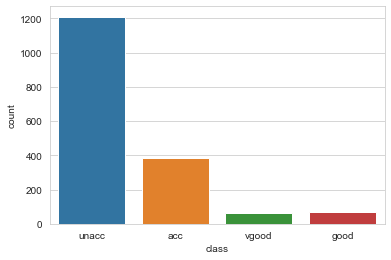

In [20]:
sns.countplot(data['class']);

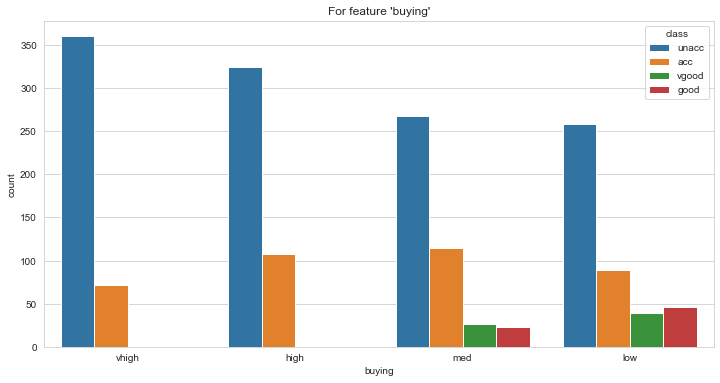

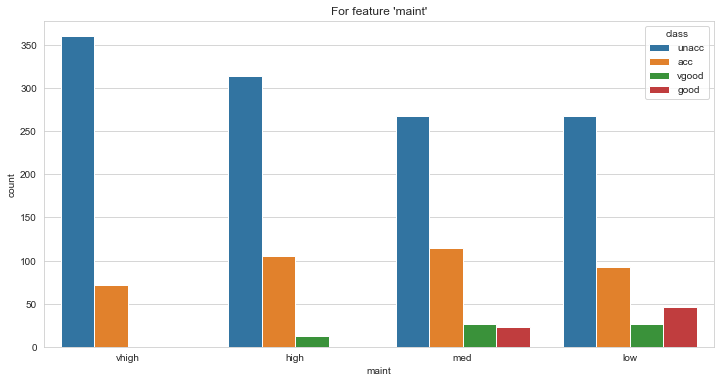

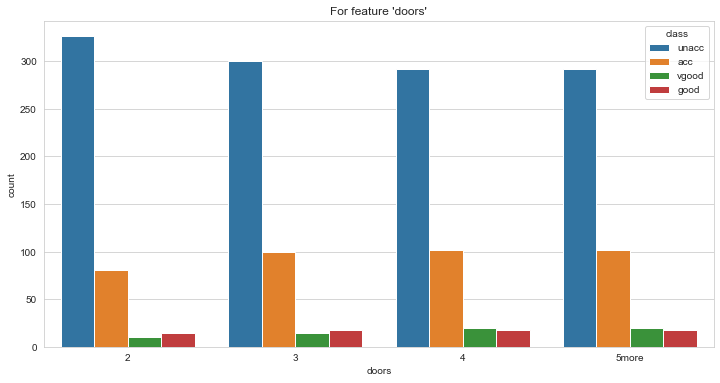

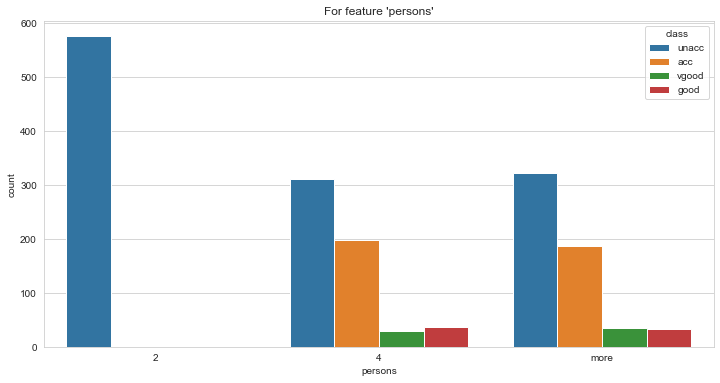

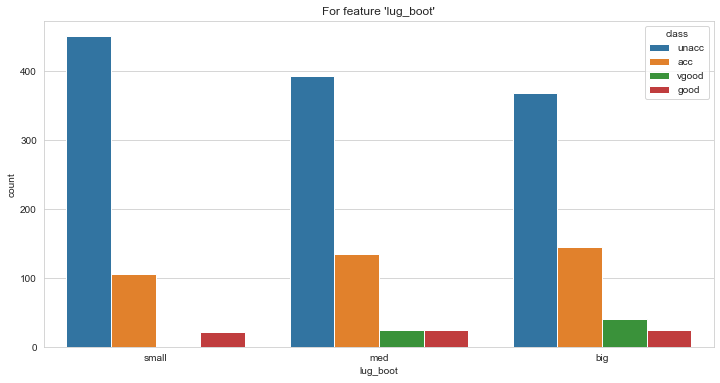

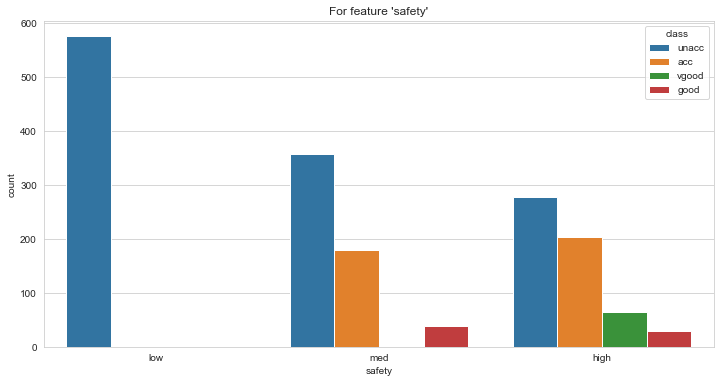

In [21]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['class']);

***As we can't do much with string datatypes, so we have to convert them into integers***

In [22]:
data['class'],class_names = pd.factorize(data['class'])

In [23]:
print(class_names)
print(data['class'].unique())

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')
[0 1 2 3]


In [24]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0


In [25]:
data['buying'],_ = pd.factorize(data['buying'])
data['maint'],_ = pd.factorize(data['maint'])
data['doors'],_ = pd.factorize(data['doors'])
data['persons'],_ = pd.factorize(data['persons'])
data['lug_boot'],_ = pd.factorize(data['lug_boot'])
data['safety'],_ = pd.factorize(data['safety'])
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


## Feature Engineering

**We can see that all the variables are ordinal categorical data type.**

**So we convert all the categories into number.**

In [27]:
X = data.drop('class',axis=1)
y = data['class']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
dtree = DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)

In [32]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [33]:
dtree_rep = tree.export_text(dtree)
print(dtree_rep)

|--- feature_5 <= 0.50
|   |--- class: 0
|--- feature_5 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- class: 3



In [34]:
dtree.score(X_train,y_train)

0.8569065343258891

In [35]:
y_pred = dtree.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.8362235067437379

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       358
           1       0.76      0.68      0.72       118
           2       0.00      0.00      0.00        24
           3       0.30      1.00      0.46        19

    accuracy                           0.84       519
   macro avg       0.50      0.65      0.53       519
weighted avg       0.84      0.84      0.83       519



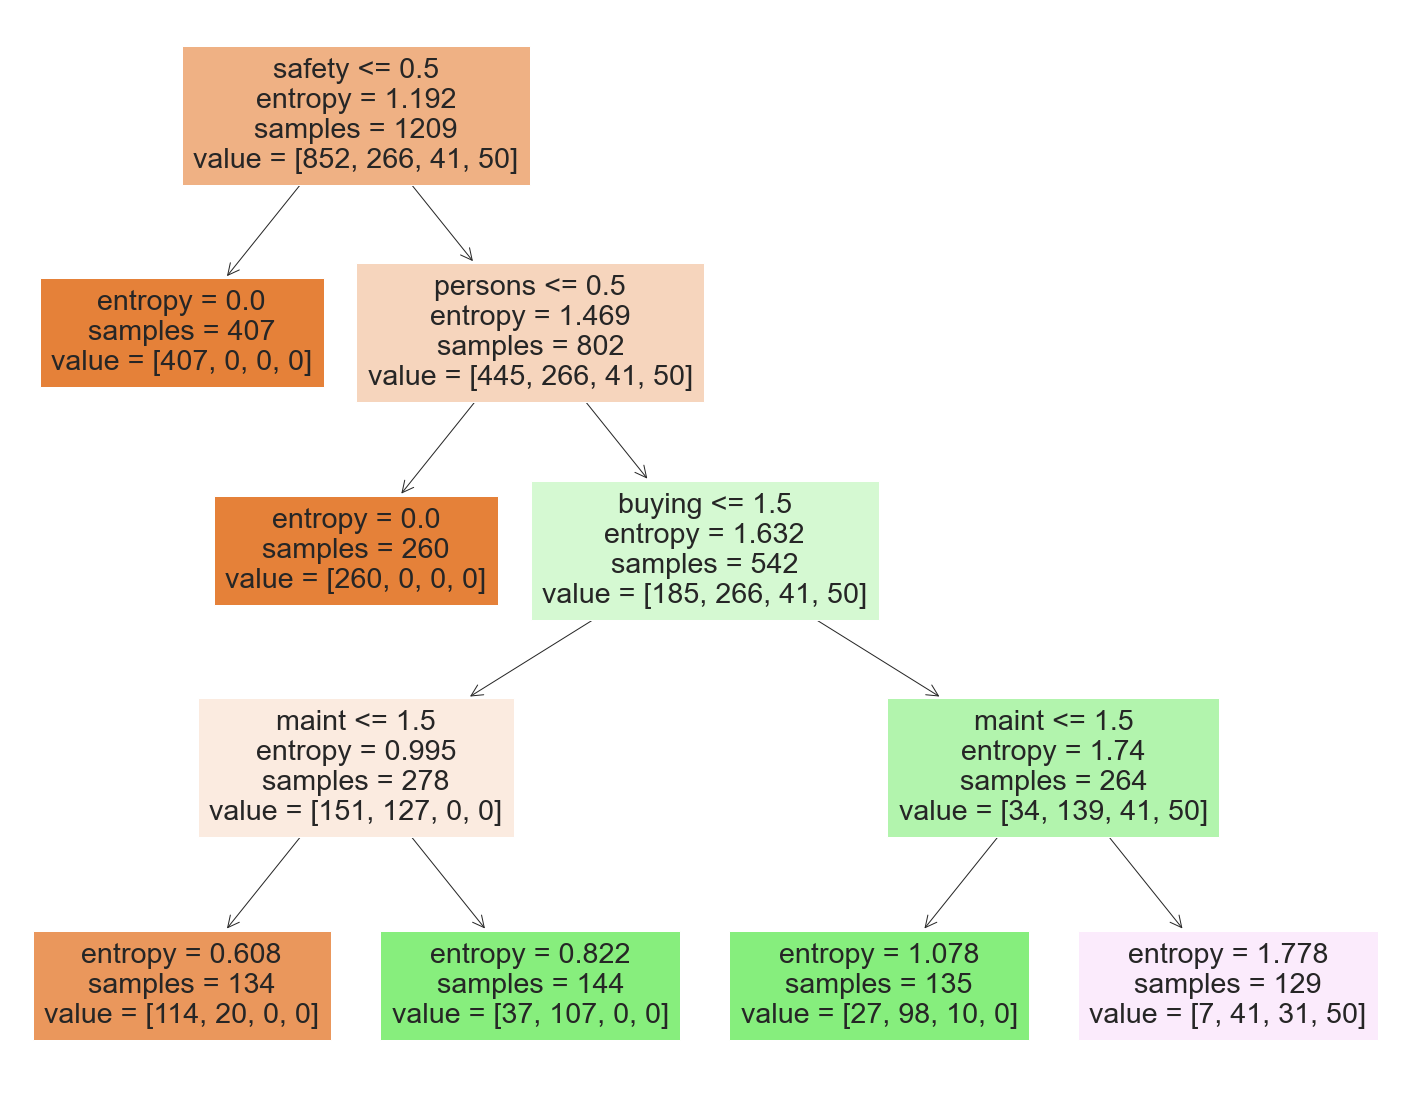

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=list(X.columns),  
                   filled=True)